100%|██████████| 53/53 [00:01<00:00, 45.88it/s] 


Train on 200 samples
Epoch 1/50
200/200 [==============================] - 0s 2ms/sample - loss: 4.2688 - accuracy: 0.4850
Epoch 2/50
200/200 [==============================] - 0s 635us/sample - loss: 0.7391 - accuracy: 0.5200
Epoch 3/50
200/200 [==============================] - 0s 605us/sample - loss: 0.6904 - accuracy: 0.5300
Epoch 4/50
200/200 [==============================] - 0s 595us/sample - loss: 0.6736 - accuracy: 0.5850
Epoch 5/50
200/200 [==============================] - 0s 595us/sample - loss: 0.6689 - accuracy: 0.6100
Epoch 6/50
200/200 [==============================] - 0s 595us/sample - loss: 0.6590 - accuracy: 0.6400
Epoch 7/50
200/200 [==============================] - 0s 630us/sample - loss: 0.6699 - accuracy: 0.5950
Epoch 8/50
200/200 [==============================] - 0s 625us/sample - loss: 0.6539 - accuracy: 0.6150
Epoch 9/50
200/200 [==============================] - 0s 620us/sample - loss: 0.6319 - accuracy: 0.7600
Epoch 10/50
200/200 [========================

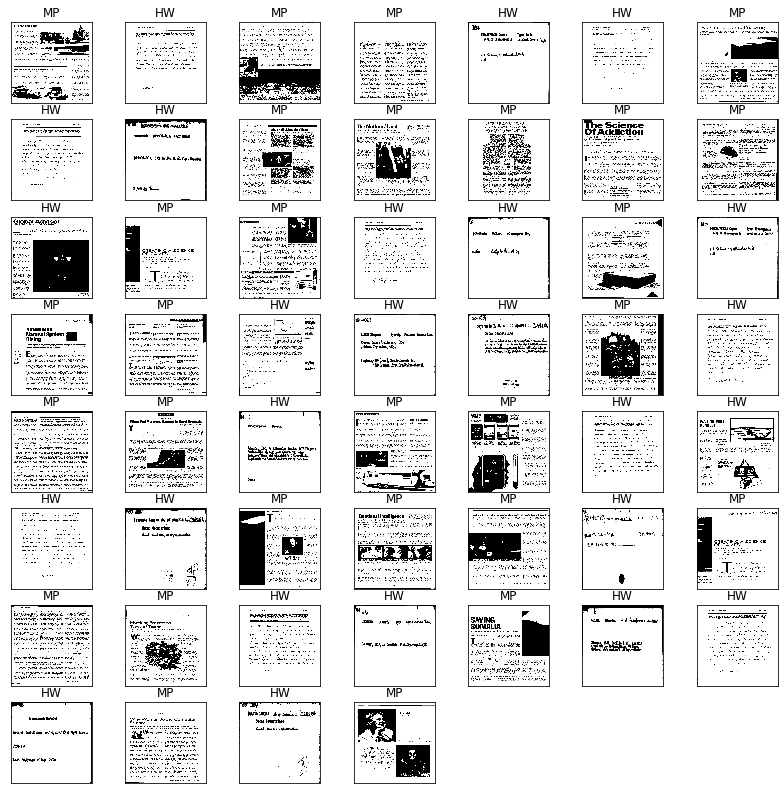

In [9]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


train_data = r'C:\Users\Ryzen\Anaconda3\envs\PythonGPU\TestImages\Project\train'
test_data = r'C:\Users\Ryzen\Anaconda3\envs\PythonGPU\TestImages\Project\test'

def get_label(img):
    label = img.split('.')[0]
    if label == 'hw':
        lbl = np.array([1,0])
    elif label == 'mp':
        lbl = np.array([0,1])
    return lbl

def train_lbl():
    train_images = []
    for i in tqdm(os.listdir(train_data)):
        path = os.path.join(train_data, i )
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (256,256))
        train_images.append([np.array(img),get_label(i)])
    shuffle(train_images)
    return train_images


def test_lbl():
    test_images=[]
    for i in tqdm(os.listdir(test_data)):
        path = os.path.join(test_data, i )
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (256,256))
        img = tf.cast(img,tf.float32)
        test_images.append([np.array(img),get_label(i)])
    shuffle(test_images)
    return test_images


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *


training_images = train_lbl()
testing_images = test_lbl()
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,256,256,1)
tr_lbl_data = np.array([i[1] for i in training_images])
tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,256,256,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

model = Sequential()

model.add(InputLayer(input_shape = [256,256,1]))
model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same',activation = 'relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))


model.add(Conv2D(filters=50,kernel_size=5,strides=1,padding='same',activation = 'relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))


model.add(Conv2D(filters=80,kernel_size=5,strides=1,padding='same',activation = 'relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(2,activation = 'relu'))
optimizer = Adam(lr=1e-3)

model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x = tr_img_data,y = tr_lbl_data,epochs = 50,batch_size = 100)
model.summary()

fig = plt.figure(figsize=(14,14))

for cnt, data in enumerate(testing_images[:]):
    
    y = fig.add_subplot(8,7,cnt+1)
    img = data[0]
    data = img.reshape(1,256,256,1)
    model_out = model.predict([data])
    
    if np.argmax(model_out) == 1:
        str_label = 'MP'
    else:
        str_label = 'HW'
    
    y.imshow(img,cmap = 'gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    

